<a href="https://colab.research.google.com/github/asheta66/Data-Mining-2/blob/main/SVM_BC_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)

# Load data and convert to DataFrame
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# --------------------------
# 2. Prepare Data
# --------------------------
X = df.drop(columns='target')
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Kernels to evaluate
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# Store metrics and models
results = []
trained_models = {}

# --------------------------
# 3. Train & Evaluate Models
# --------------------------
for kernel in kernels:
    model = SVC(kernel=kernel, C=1.0, gamma='scale')
    model.fit(X_train, y_train)
    trained_models[kernel] = model  # store for later use

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_metrics = [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        f1_score(y_train, y_train_pred)
    ]
    test_metrics = [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred)
    ]

    results.append({
        'Kernel': kernel,
        'Train Accuracy': train_metrics[0],
        'Train Precision': train_metrics[1],
        'Train Recall': train_metrics[2],
        'Train F1': train_metrics[3],
        'Test Accuracy': test_metrics[0],
        'Test Precision': test_metrics[1],
        'Test Recall': test_metrics[2],
        'Test F1': test_metrics[3]
    })

results_df = pd.DataFrame(results)
print("\nSVM Performance on Breast Cancer Dataset:")
print(results_df)

# --------------------------
# 4. Select Best Model
# --------------------------
best_kernel = results_df.sort_values(by='Test Accuracy', ascending=False).iloc[0]['Kernel']
print(f"\nBest kernel based on test accuracy: {best_kernel}")

# Get the best model
best_model = trained_models[best_kernel]

# Predict with best model
y_train_best = best_model.predict(X_train)
y_test_best = best_model.predict(X_test)


SVM Performance on Breast Cancer Dataset:
    Kernel  Train Accuracy  Train Precision  Train Recall  Train F1  \
0   linear        0.962637         0.965398      0.975524  0.970435   
1      rbf        0.920879         0.905844      0.975524  0.939394   
2     poly        0.909890         0.891374      0.975524  0.931553   
3  sigmoid        0.459341         0.562500      0.629371  0.594059   

   Test Accuracy  Test Precision  Test Recall   Test F1  
0       0.964912        0.958904     0.985915  0.972222  
1       0.921053        0.897436     0.985915  0.939597  
2       0.921053        0.897436     0.985915  0.939597  
3       0.403509        0.519481     0.563380  0.540541  

Best kernel based on test accuracy: linear


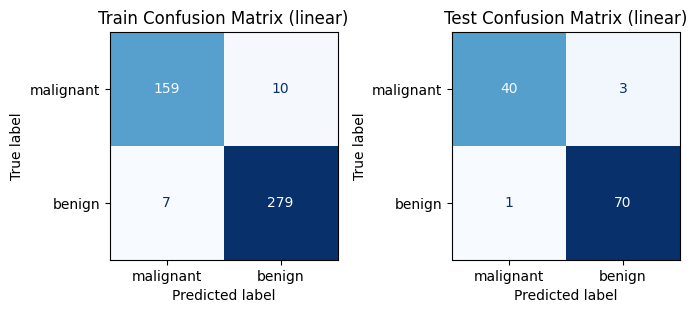

In [30]:
# --------------------------
# 5. Plot & Save Confusion Matrices
# --------------------------
fig, axs = plt.subplots(1, 2, figsize=(7, 5))

cm_train = confusion_matrix(y_train, y_train_best)
cm_test = confusion_matrix(y_test, y_test_best)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=data.target_names)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=data.target_names)

disp_train.plot(ax=axs[0], cmap='Blues', colorbar=False, values_format='d')
axs[0].set_title(f"Train Confusion Matrix ({best_kernel})", fontsize=12)
axs[0].tick_params(labelsize=10)

disp_test.plot(ax=axs[1], cmap='Blues', colorbar=False, values_format='d')
axs[1].set_title(f"Test Confusion Matrix ({best_kernel})", fontsize=12)
axs[1].tick_params(labelsize=10)

plt.tight_layout()
plt.savefig("confusion_matrices.png", dpi=300)
plt.show()

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


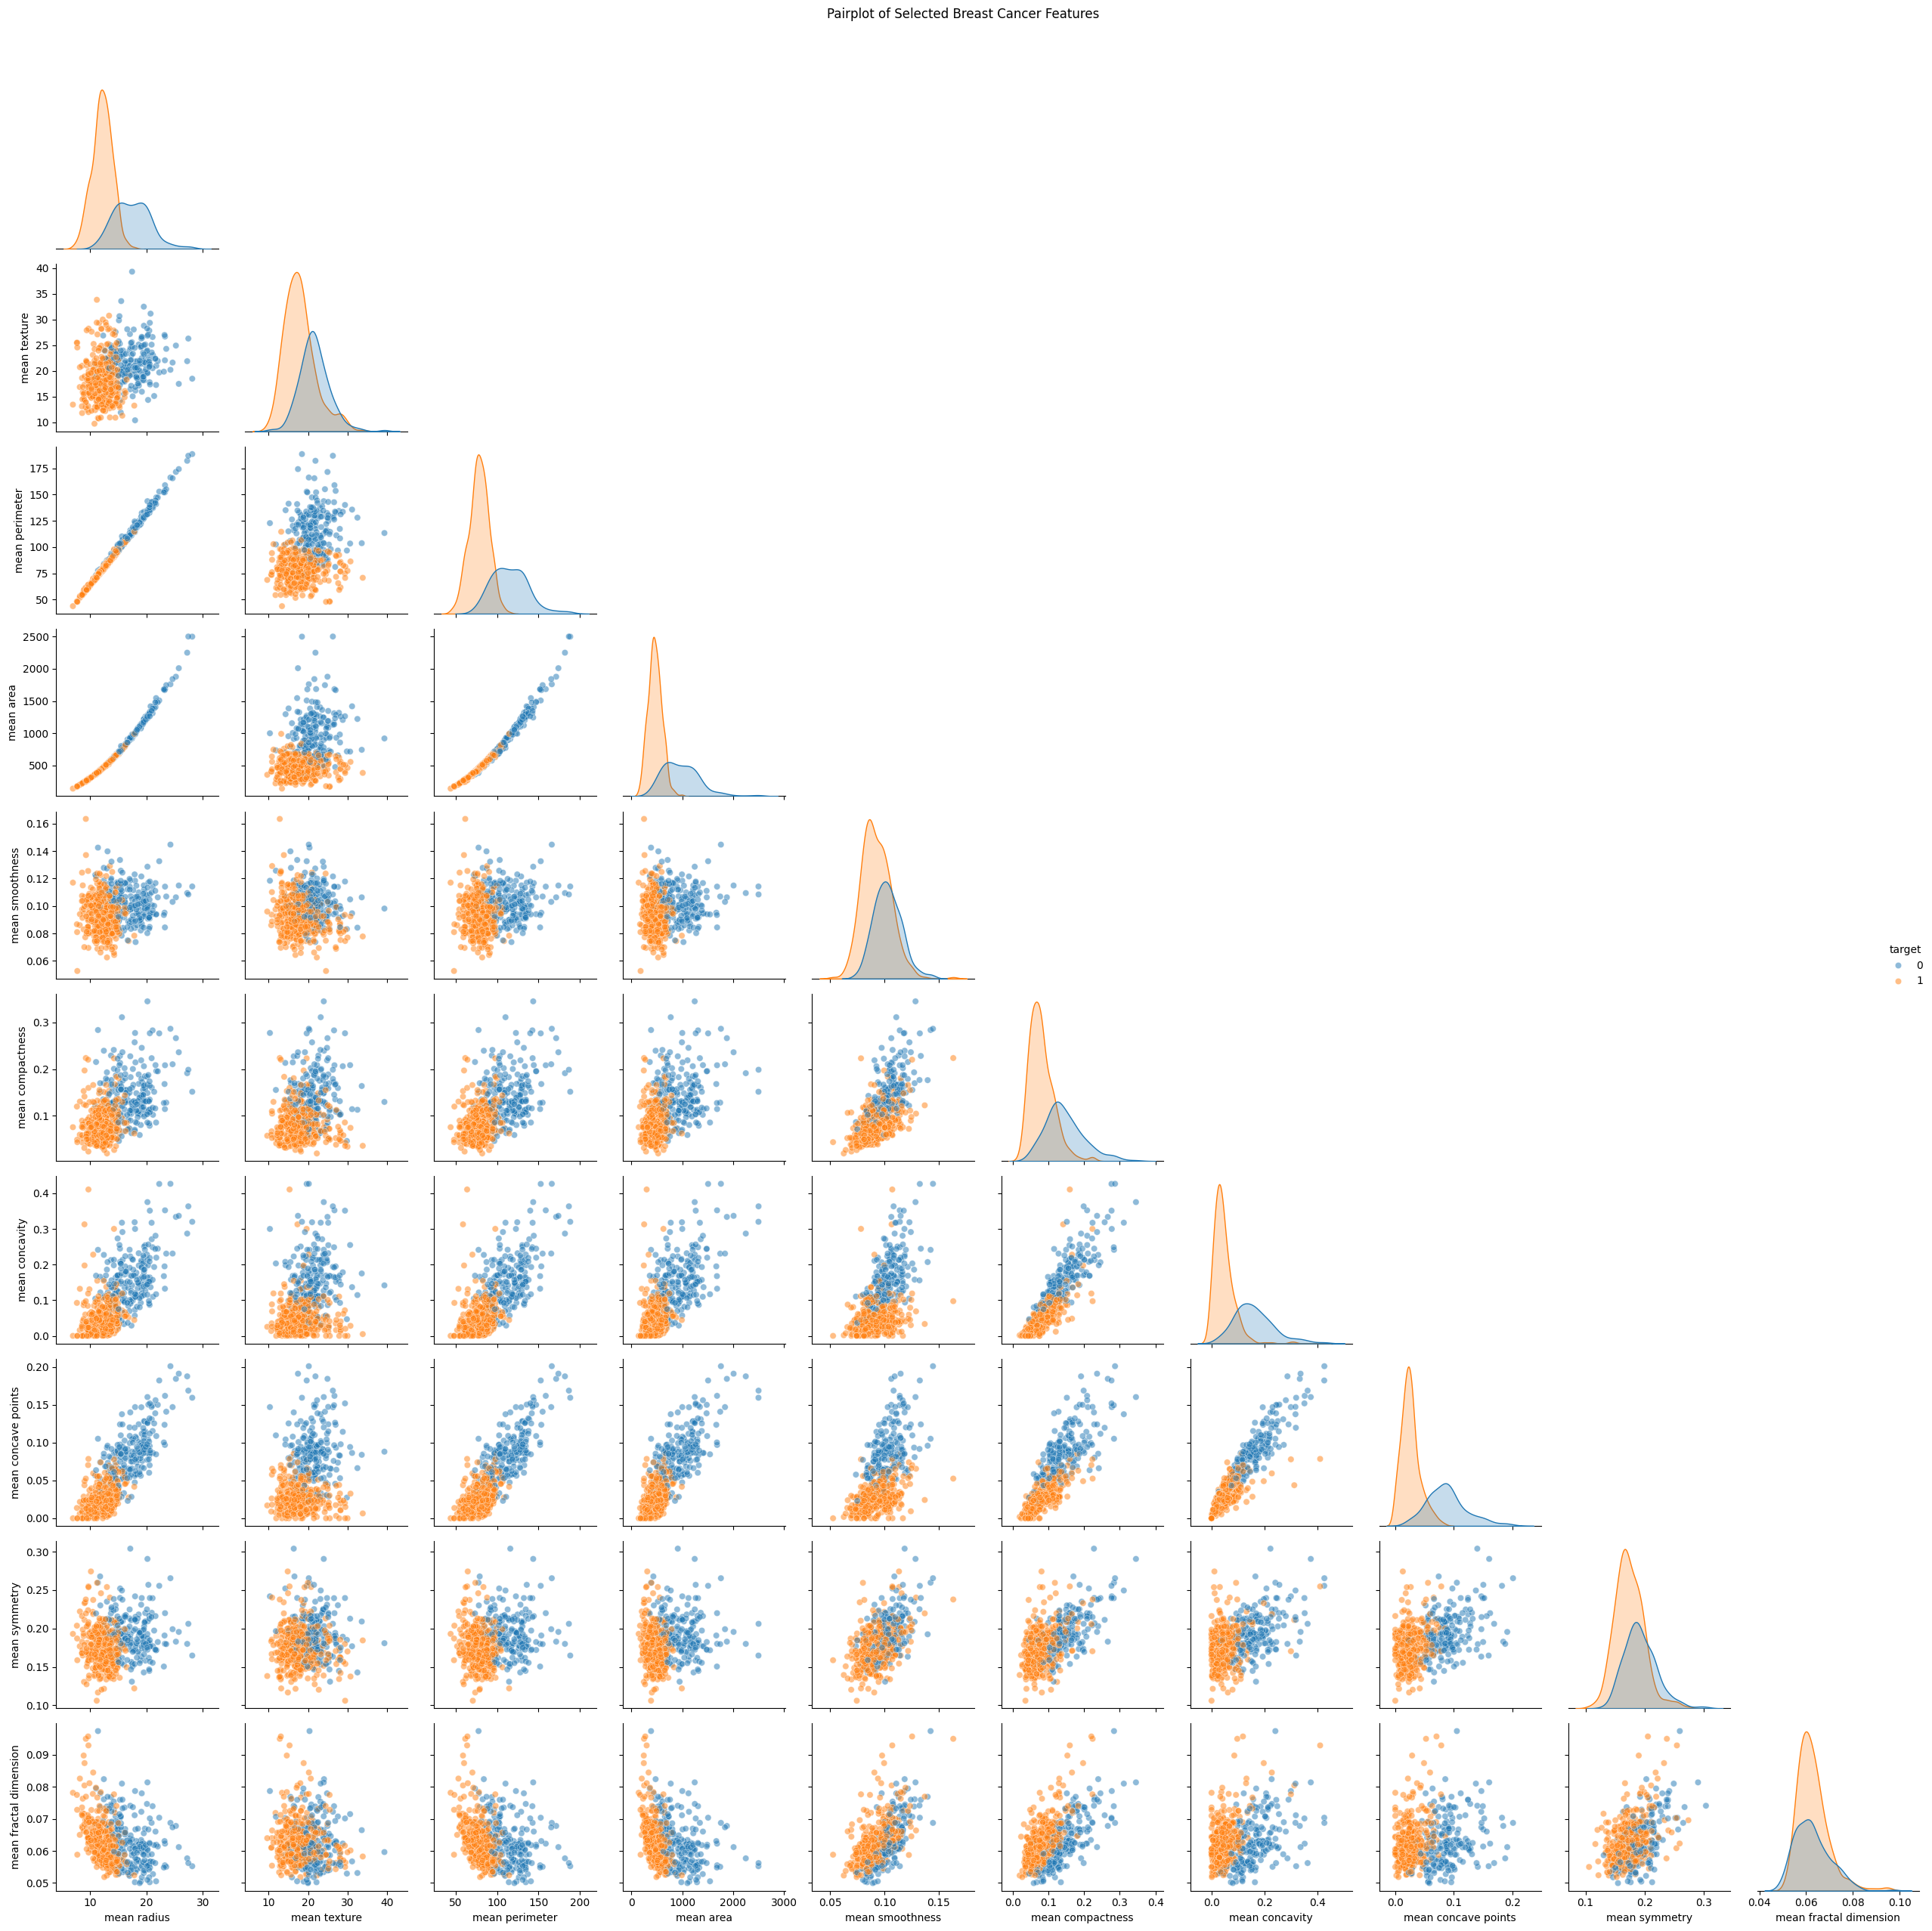

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of required features based on their common names in the dataset
selected_features = [
    "mean radius",
    "mean texture",
    "mean perimeter",
    "mean area",
    "mean smoothness",
    "mean compactness",
    "mean concavity",
    "mean concave points",
    "mean symmetry",
    "mean fractal dimension"
]

# Assuming 'data' contains the full dataset and a 'diagnosis' column
# that indicates the class (e.g., malignant or benign)
subset = df[selected_features + ['target']]

# Pairplot with hue based on diagnosis (classification target)
sns.pairplot(subset, hue='target', corner=True, plot_kws={'alpha': 0.5})

plt.suptitle("Pairplot of Selected Breast Cancer Features", y=1.02)
plt.tight_layout()
plt.show()

In [33]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [34]:
# Create a DataFrame of results
results_df = pd.DataFrame(results)
print("\nSVM Performance on Breast Cancer Dataset:")
results_df


SVM Performance on Breast Cancer Dataset:


,Kernel,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
0,linear,0.962637,0.965398,0.975524,0.970435,0.964912,0.958904,0.985915,0.972222
1,rbf,0.920879,0.905844,0.975524,0.939394,0.921053,0.897436,0.985915,0.939597
2,poly,0.909890,0.891374,0.975524,0.931553,0.921053,0.897436,0.985915,0.939597
3,sigmoid,0.459341,0.562500,0.629371,0.594059,0.403509,0.519481,0.563380,0.540541


In [35]:
# Install SHAP if not already installed
!pip install shap

  0%|          | 0/114 [00:00<?, ?it/s]

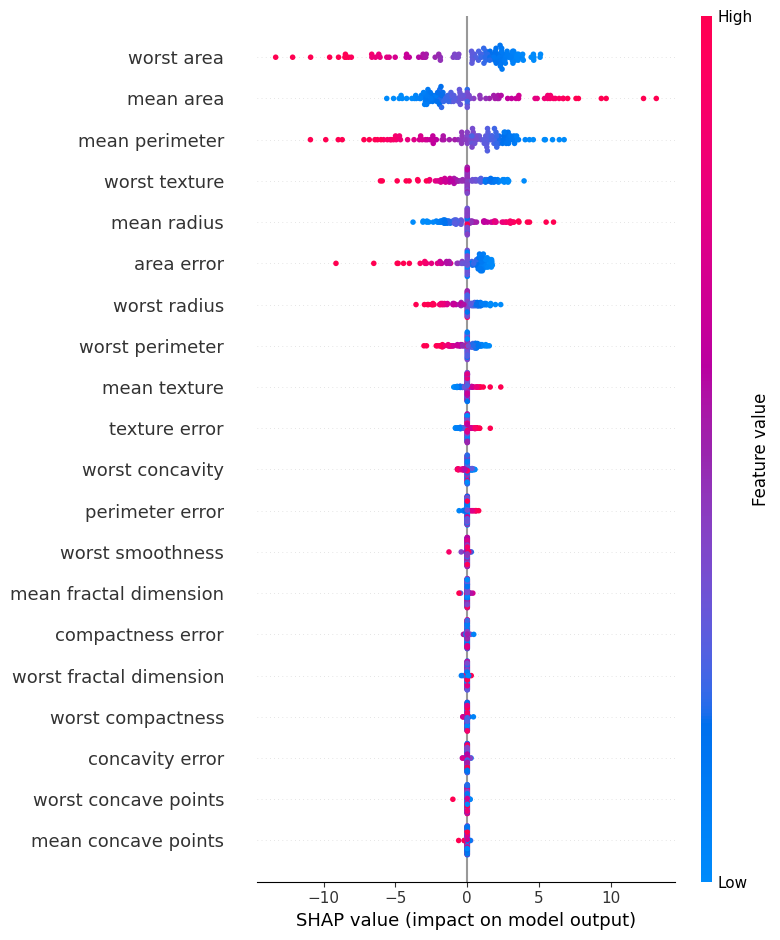

In [36]:
# Do NOT use shap.initjs() or interactive plots
import shap
import matplotlib.pyplot as plt

# Disable widget generation
shap.initjs = lambda: None  # Prevents metadata.widgets issues

# Define model prediction function
predict_fn = (
    best_model.predict_proba if hasattr(best_model, "predict_proba")
    else best_model.decision_function
)

# Sample background data
X_background = shap.sample(X_train, 100, random_state=0)

# Create explainer
explainer = shap.KernelExplainer(predict_fn, X_background)

# Compute SHAP values
shap_values = explainer.shap_values(X_test, nsamples=100)

# Plot and save summary (static image only)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, show=False)
plt.tight_layout()
plt.savefig("SHAP_values.png", dpi=300)
plt.show()
